In [29]:
import json
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from operator import itemgetter
import numpy as np
from collections import defaultdict

In [30]:
sns.set()

In [31]:
FA_2023 = pd.read_csv('../datasets/FA+NWSL/FA_2023.csv',)

In [32]:
FA_2022 = pd.read_csv('../datasets/FA+NWSL/FA_2022.csv')

In [33]:
FA_2021 = pd.read_csv('../datasets/FA+NWSL/FA_2021.csv')

In [34]:
FA_all = pd.merge(FA_2021[['Nation', '# Players']], FA_2022[['Nation', '# Players']], on='Nation', how = 'outer').merge(
    FA_2023[['Nation', '# Players']], on='Nation', how = 'outer')

In [35]:
FA_all.columns = ['Nation', 'FA_2021', 'FA_2022', 'FA_2023']

In [36]:
FA_all = FA_all.drop([0,25])

In [37]:
FA_all = FA_all.fillna(0)

In [38]:
FA_all[['FA_2021', 'FA_2022', 'FA_2023']] = FA_all[['FA_2021', 'FA_2022', 'FA_2023']].astype('int')

In [39]:
FA_all = FA_all.sort_values(by = 'FA_2023', ascending = False)

In [47]:
FA_all.reset_index(drop = True, inplace = True)

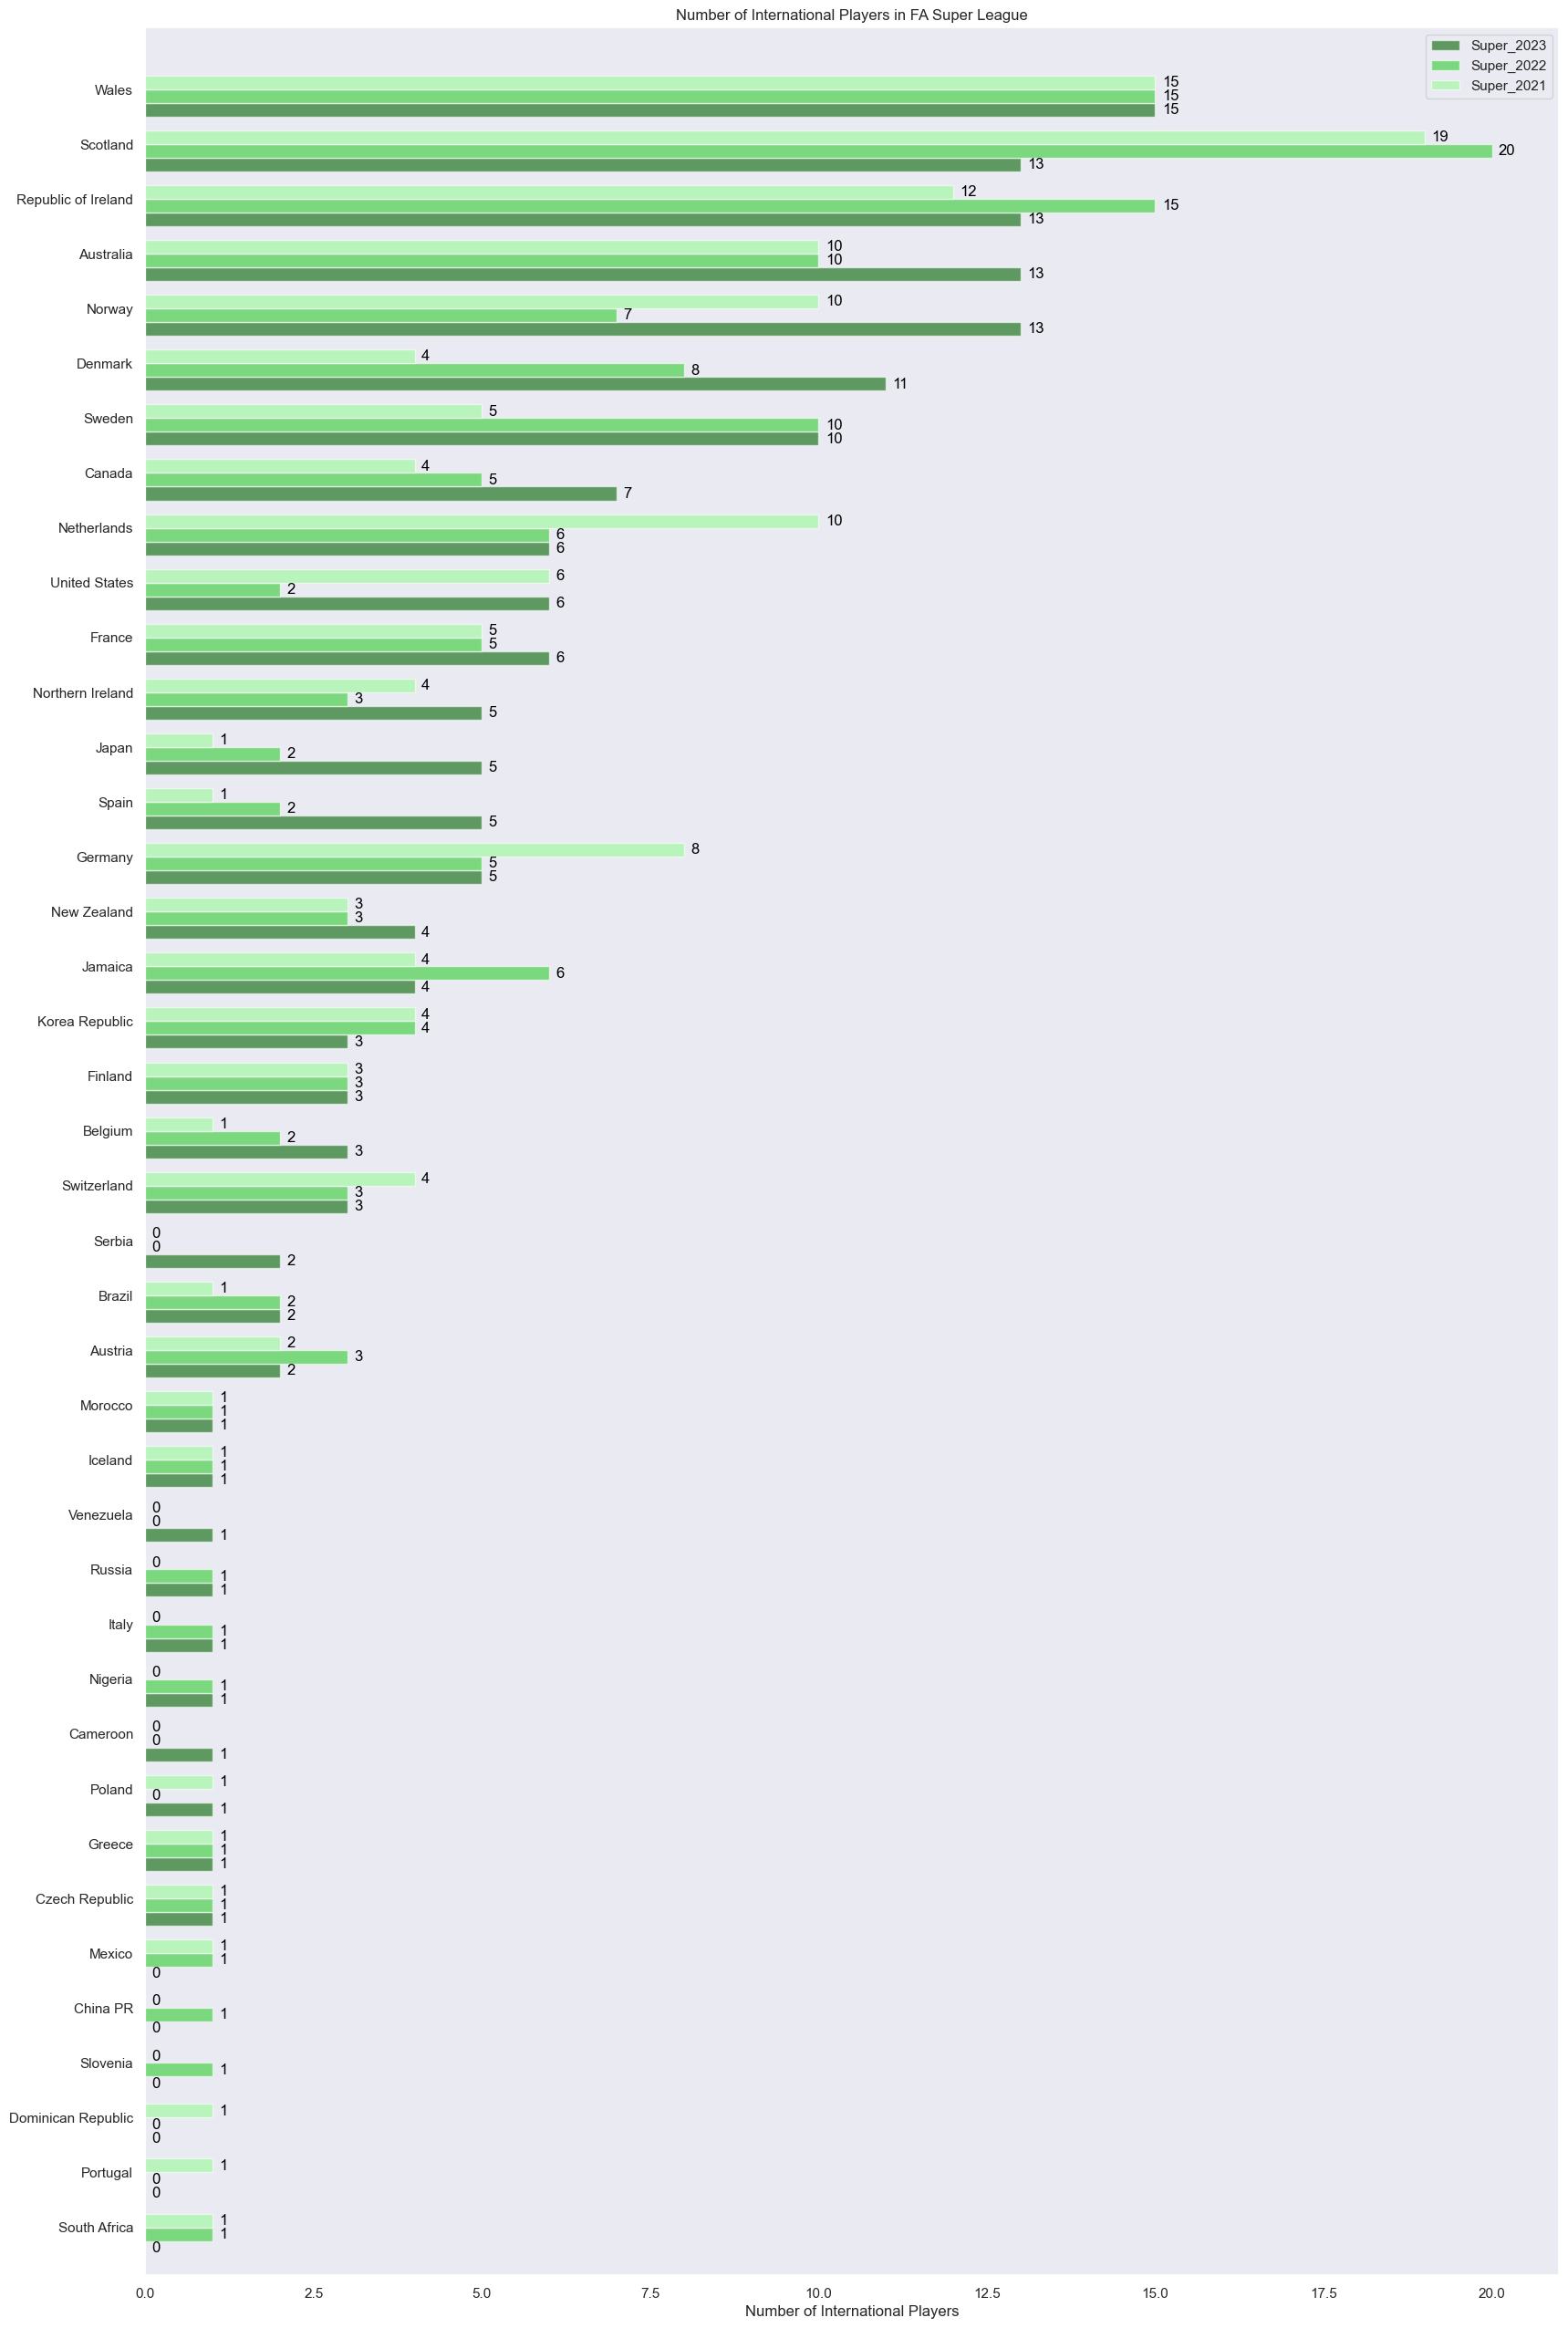

In [46]:
fig, ax = plt.subplots(figsize =(20, 32))
sns.set_style('dark')

country = FA_all['Nation'][::-1]
FA_2021 = FA_all['FA_2021'][::-1]
FA_2022 = FA_all['FA_2022'][::-1]
FA_2023 = FA_all['FA_2023'][::-1]

ind = np.arange(len(country))
width=0.25 

ax = plt.subplot(111)
ax.barh(ind - width * 2, FA_2023, width, align='center', alpha=0.6, color='darkgreen', label='Super_2023') 
ax.barh(ind - width, FA_2022, width, align='center', alpha=0.6, color='limegreen', label='Super_2022') 
ax.barh(ind, FA_2021, width, align='center', alpha=0.6, color='palegreen', label='Super_2021') 


for i, (x, y1, y2, y3) in enumerate(zip(ind, FA_2021, FA_2022, FA_2023)):
    ax.text(y3 + 0.1, i - width * 2, str(y3), ha='left', va='center', color='black')
    ax.text(y2 + 0.1, i - width, str(y2), ha='left', va='center', color='black')
    ax.text(y1 + 0.1, i, str(y1), ha='left', va='center', color='black')

ax.set(yticks=ind - width/2, yticklabels=country, ylim=[- 1, len(country)])
plt.xlabel('Number of International Players')
plt.title('Number of International Players in FA Super League')
plt.legend()
plt.savefig('../report/charts/Super_Inter_Player.pdf',bbox_inches='tight')

In [49]:
NWSL_2023 = pd.read_csv('../datasets/FA+NWSL/NWSL_2023.csv',)

NWSL_2022 = pd.read_csv('../datasets/FA+NWSL/NWSL_2022.csv')

NWSL_2021 = pd.read_csv('../datasets/FA+NWSL/NWSL_2021.csv')

NWSL_all = pd.merge(NWSL_2021[['Nation', '# Players']], NWSL_2022[['Nation', '# Players']], on='Nation', how = 'outer').merge(
    NWSL_2023[['Nation', '# Players']], on='Nation', how = 'outer')

In [50]:
NWSL_all.columns = ['Nation', 'NWSL_2021', 'NWSL_2022', 'NWSL_2023']

NWSL_all = NWSL_all.drop([0,25])

NWSL_all = NWSL_all.fillna(0)

NWSL_all['NWSL_2021'] = NWSL_all['NWSL_2021'].astype('int')
NWSL_all['NWSL_2022'] = NWSL_all['NWSL_2022'].astype('int')
NWSL_all['NWSL_2023'] = NWSL_all['NWSL_2023'].astype('int')

In [51]:
NWSL_all = NWSL_all.sort_values(by = 'NWSL_2023', ascending = False)

In [ ]:
NWSL_all.reset_index(drop = True, inplace = True)

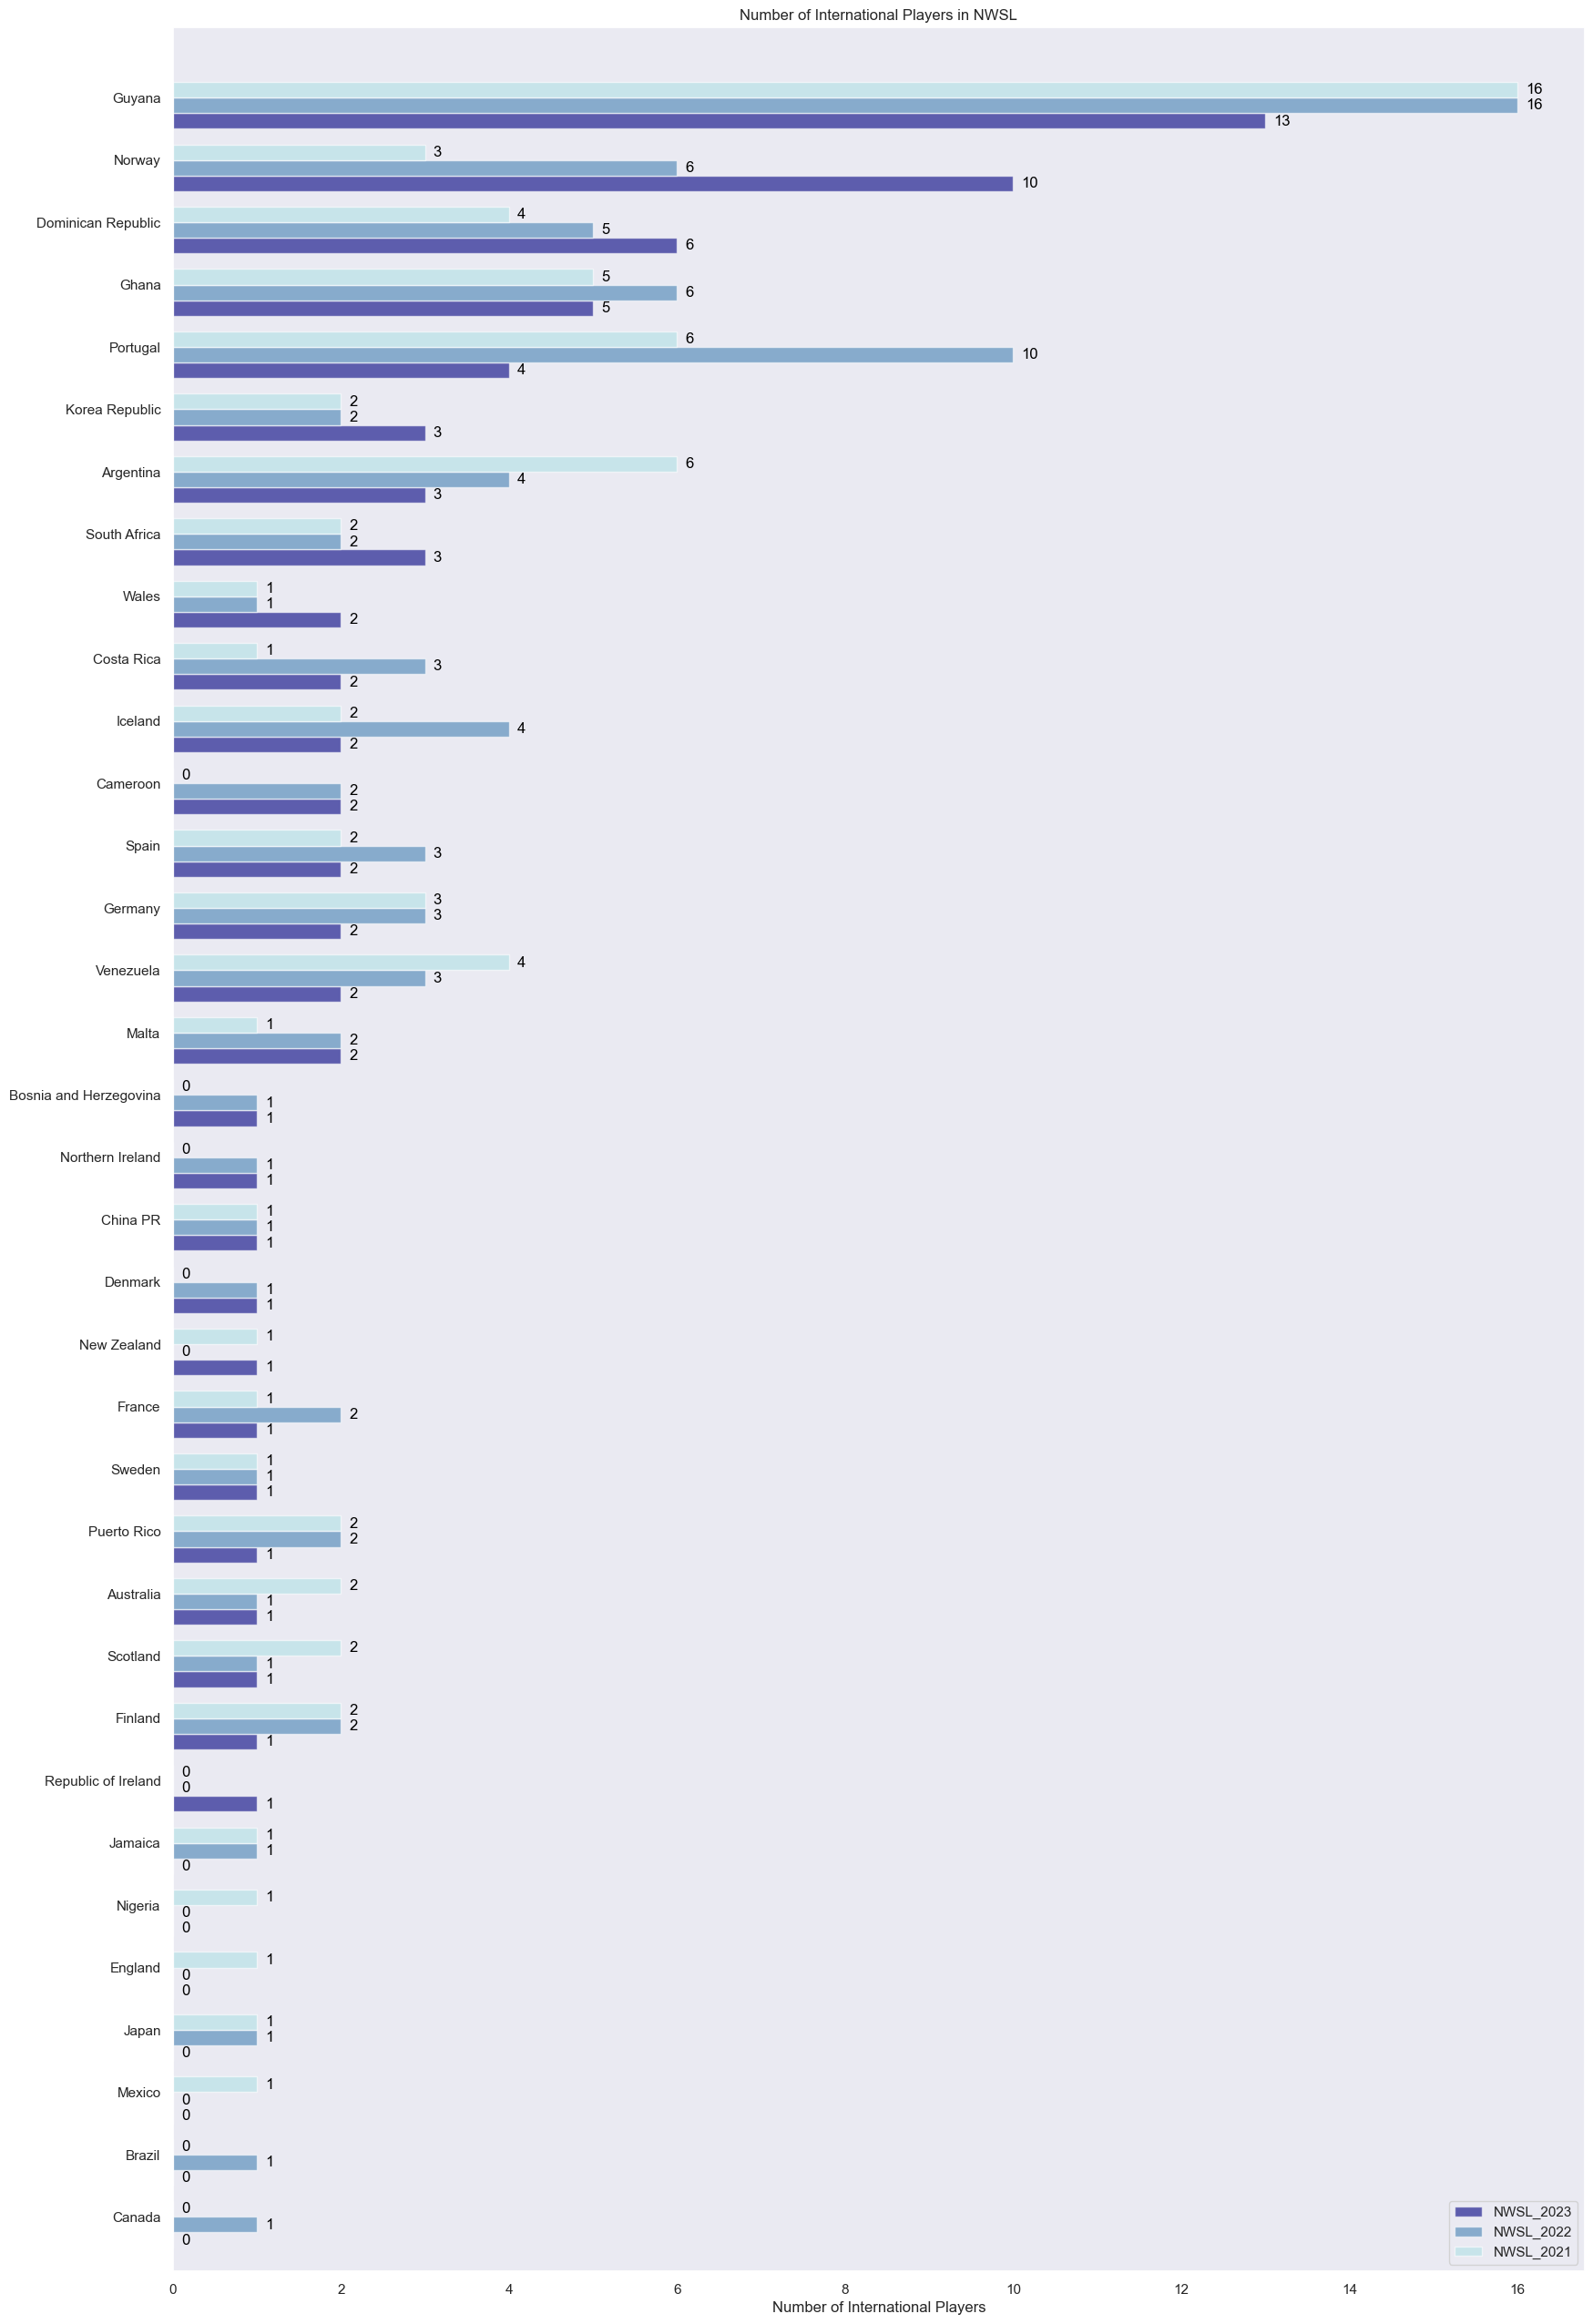

In [53]:
fig, ax = plt.subplots(figsize =(20, 32))
sns.set_style('dark')

country = NWSL_all.Nation
NWSL_2021 = NWSL_all['NWSL_2021'][::-1]
NWSL_2022 = NWSL_all['NWSL_2022'][::-1]
NWSL_2023 = NWSL_all['NWSL_2023'][::-1]

ind = np.arange(len(country))
width=0.25 

ax = plt.subplot(111)
ax.barh(ind - width * 2, NWSL_2023, width, align='center', alpha=0.6, color='navy', label='NWSL_2023')  
ax.barh(ind - width, NWSL_2022, width, align='center', alpha=0.6, color='steelblue', label='NWSL_2022') 
ax.barh(ind, NWSL_2021, width, align='center', alpha=0.6, color='powderblue', label='NWSL_2021') 



for i, (x, y1, y2, y3) in enumerate(zip(ind, NWSL_2021, NWSL_2022, NWSL_2023)):
    ax.text(y3 + 0.1, i - width * 2, str(y3), ha='left', va='center', color='black')
    ax.text(y2 + 0.1, i - width, str(y2), ha='left', va='center', color='black')
    ax.text(y1 + 0.1, i, str(y1), ha='left', va='center', color='black')

ax.set(yticks=ind - width/2, yticklabels=country, ylim=[- 1, len(country)])
plt.xlabel('Number of International Players')
plt.title('Number of International Players in NWSL')
plt.legend()
plt.savefig('../report/charts/NWSL_Inter_Player.pdf',bbox_inches='tight')